In [1]:
using DataFrames
using CSV
using Plots
using StatsBase
using Lathe
using GLM
using Statistics
using StatsPlots
using MLBase

In [2]:
load_df_model = DataFrame(CSV.File("/filepath/filename.csv"))

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status
,Int64,Int64,String,Int64,String,String
1,0,45,M,3,High School,Married
2,0,49,F,5,College/Grad,Single
3,0,51,M,3,College/Grad,Married
4,0,40,F,4,High School,Unknown
5,0,40,M,3,Uneducated,Married
6,0,44,M,2,College/Grad,Married
7,0,51,M,4,Unknown,Married
8,0,32,M,0,High School,Unknown
9,0,37,M,3,Uneducated,Single


In [3]:
names(load_df_model)

20-element Array{Symbol,1}:
 :Attrition_Flag
 :Customer_Age
 :Gender
 :Dependent_count
 :Education_Level
 :Marital_Status
 :Income_Category
 :Card_Category
 :Months_on_book
 :Total_Relationship_Count
 :Months_Inactive_12_mon
 :Contacts_Count_12_mon
 :Credit_Limit
 :Total_Revolving_Bal
 :Avg_Open_To_Buy
 :Total_Amt_Chng_Q4_Q1
 :Total_Trans_Amt
 :Total_Trans_Ct
 :Total_Ct_Chng_Q4_Q1
 :Avg_Utilization_Ratio

In [4]:
summarystats(load_df_model.Attrition_Flag)

Summary Stats:
Length:         10127
Missing Count:  0
Mean:           0.160660
Minimum:        0.000000
1st Quartile:   0.000000
Median:         0.000000
3rd Quartile:   0.000000
Maximum:        1.000000


In [5]:
fm = @formula(Attrition_Flag ~ Gender+Dependent_count+Education_Level+Income_Category+Months_on_book+Total_Relationship_Count+Months_Inactive_12_mon+Contacts_Count_12_mon+Credit_Limit+Total_Trans_Ct+Total_Ct_Chng_Q4_Q1+Avg_Utilization_Ratio)
logit = glm(fm, load_df_model, Binomial(), ProbitLink())
# fm = @formula(Attrition_Flag ~ Gender)
# logit = glm(fm, load_df_model, Binomial(), ProbitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},ProbitLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Attrition_Flag ~ 1 + Gender + Dependent_count + Education_Level + Income_Category + Months_on_book + Total_Relationship_Count + Months_Inactive_12_mon + Contacts_Count_12_mon + Credit_Limit + Total_Trans_Ct + Total_Ct_Chng_Q4_Q1 + Avg_Utilization_Ratio

Coefficients:
────────────────────────────────────────────────────────────────────────────────────────────────────
                                       Coef.  Std. Error       z  Pr(>|z|)    Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)                       2.31451     0.165126     14.02    <1e-43   1.99087      2.63815
Gender: M                        -0.38155     0.0736151    -5.18    <1e-6   -0.525833    -0.237267
Dependent_count      

In [12]:
# prediction = predict(logit,load_df_model)
# prediction_class = [if x < 0.5 0 else 1 end for x in prediction];
#     prediction_df = DataFrame(y_actual = load_df_model.Attrition_Flag, y_predicted = prediction_class, prob_predicted = prediction);
#     prediction_df.correctly_classified = prediction_df.y_actual .== prediction_df.y_predicted

prediction = predict(logit,load_df_model)    
prediction_class = [if x < 0.010578 0 else 1 end for x in prediction];
    prediction_df = DataFrame(y_actual = load_df_model.Attrition_Flag, y_predicted = prediction_class, prob_predicted = prediction);
    prediction_df.correctly_classified = prediction_df.y_actual .== prediction_df.y_predicted    

10127-element BitArray{1}:
 1
 1
 1
 1
 1
 0
 0
 0
 0
 0
 0
 0
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [13]:
accuracy = mean(prediction_df.correctly_classified)

0.4067344722030216

In [14]:
confusion_matrix = MLBase.roc(prediction_df.y_actual, prediction_df.y_predicted)

ROCNums{Int64}
  p = 1627
  n = 8500
  tp = 1607
  tn = 2512
  fp = 5988
  fn = 20


In [15]:
Recall = confusion_matrix.tp/(confusion_matrix.tp+confusion_matrix.fn)

0.9877074370006146

In [16]:
Precision = confusion_matrix.tp/(confusion_matrix.tp+confusion_matrix.fp)

0.21158657011191573

In [11]:
summarystats(prediction)

Summary Stats:
Length:         10127
Missing Count:  0
Mean:           0.162019
Minimum:        0.000000
1st Quartile:   0.010578
Median:         0.055142
3rd Quartile:   0.212371
Maximum:        0.997014


In [17]:
Acc_St = []

Any[]

In [18]:
cut_st_off = []

Any[]

In [19]:
Rec_St = []

Any[]

In [20]:
Prec_St = []

Any[]

In [21]:
for i in 1:251
    c_off = (i-1)/1000
    prediction = predict(logit,load_df_model)    
    prediction_class = [if x < c_off 0 else 1 end for x in prediction];
        prediction_df = DataFrame(y_actual = load_df_model.Attrition_Flag, y_predicted = prediction_class, prob_predicted = prediction);
        prediction_df.correctly_classified = prediction_df.y_actual .== prediction_df.y_predicted  
    
    
    
    push!(Acc_St, mean(prediction_df.correctly_classified))
    confusion_matrix = MLBase.roc(prediction_df.y_actual, prediction_df.y_predicted)    
    Recall = confusion_matrix.tp/(confusion_matrix.tp+confusion_matrix.fn)
    Precision = confusion_matrix.tp/(confusion_matrix.tp+confusion_matrix.fp)    
    push!(Rec_St, Recall) 
    push!(Prec_St, Precision)
    push!(cut_st_off, c_off)
        
end 

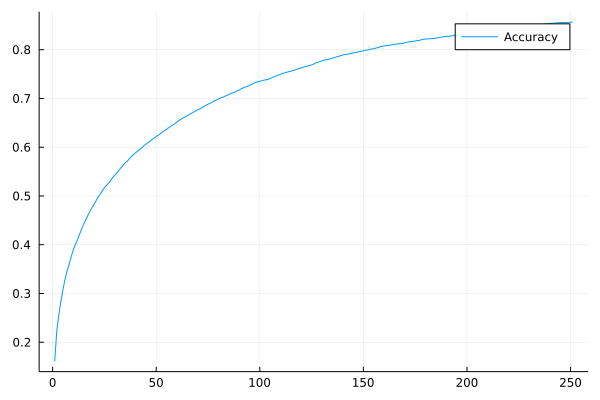

In [26]:
plot(Acc_St,label = "Accuracy")

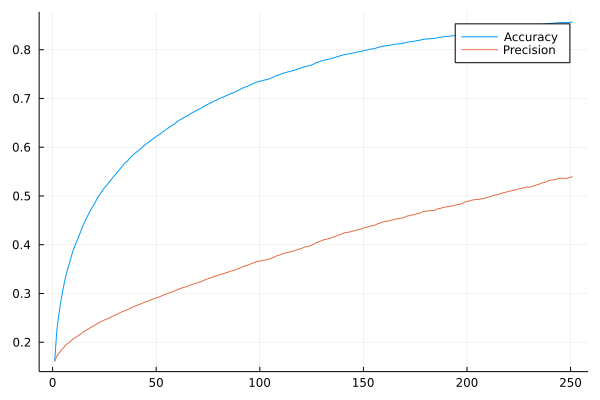

In [27]:
plot!(Prec_St,label = "Precision")

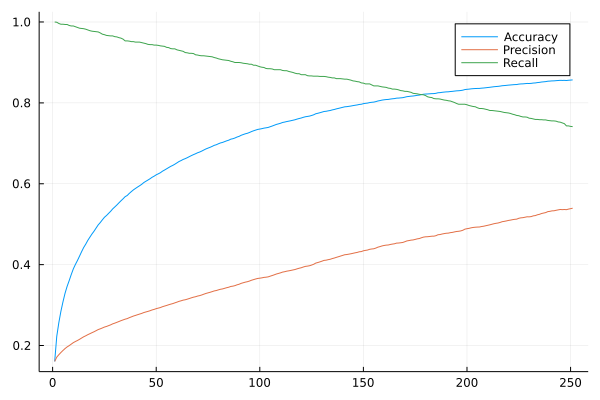

In [29]:
plot!(Rec_St,label = "Recall")

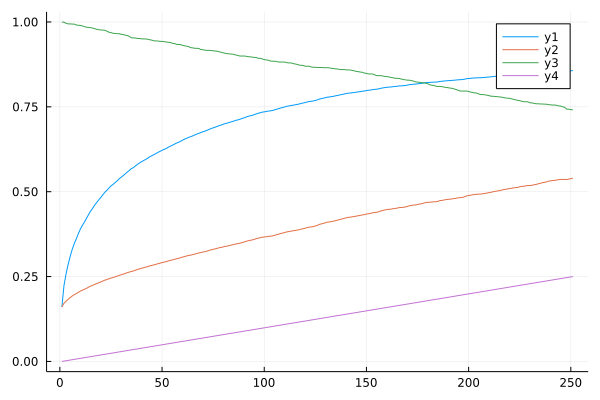

In [25]:
plot!(cut_st_off)